In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from ipywidgets import interact, interact_manual
from IPython.display import clear_output
%matplotlib inline

In [2]:
# Plotting Function
def plot_objective(objective, x_range=(-5, 5), y_range=(-5, 5), num_points=100):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    x, y = np.meshgrid(x, y)

    z = objective([x, y])

    fig = plt.figure(figsize=(12, 6))

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(x, y, z, cmap='viridis')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Objective')
    ax1.set_title('3D Plot')

    # 2D contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(x, y, z, cmap='viridis')
    plt.colorbar(contour)

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Contour Plot')

    plt.tight_layout()
    plt.show()

# Benchmark Functions

### Ackley Function

$$f= -20 \cdot \text{exp}\left(-0.2 \cdot \sqrt{\frac{1}{D} \sum_{i=1}^{D} \left(\boldsymbol{x}_i^2\right)}\right) - \text{exp}\left(\frac{1}{D} \sum_{i=1}^{D} \text{cos}\left(2\pi \cdot \boldsymbol{x}_i\right)\right)
$$

$$ $$
The Ackley function has 1 global minimum located at at $x=(0,0)$

In [3]:
def ackley(x): # Ackley function
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 *
     (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20

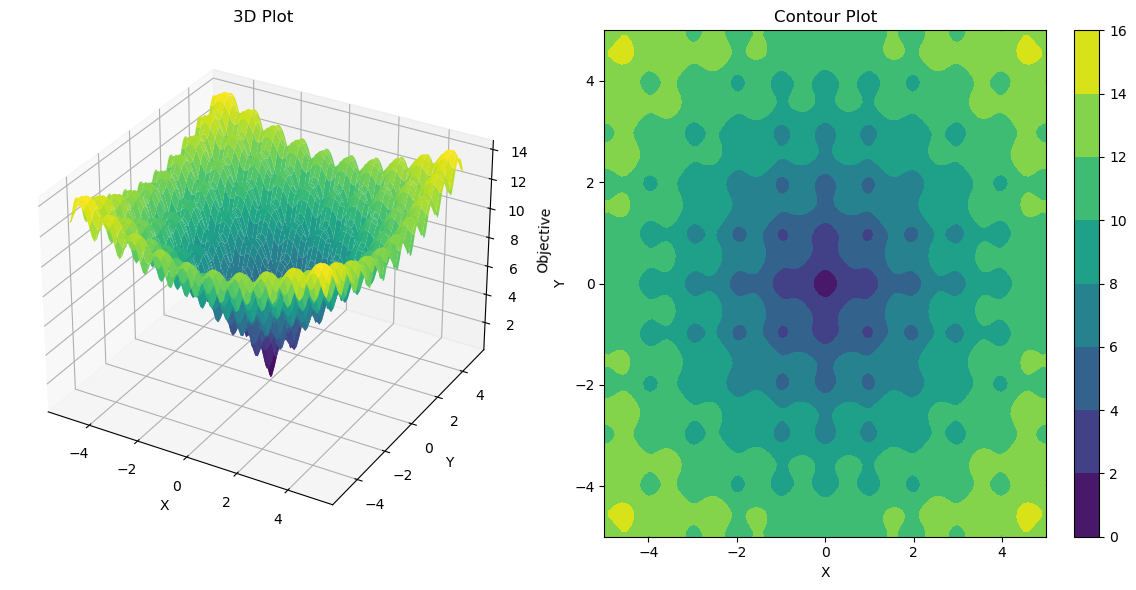

In [4]:
plot_objective(ackley, x_range=(-5, 5), y_range=(-5, 5), num_points=100)

### Cross-in-Tray Function

$$
f = -0.0001 \left( \left| \sin(x_0) \sin(x_1) \exp \left( \left| 100 - \frac{\sqrt{x_0^2 + x_1^2}}{\pi} \right| \right) \right| + 1 \right)^{0.1}
$$
$$$$

The Cross-in-Tray function has 4 global minima located at $x = (1.3491,-1.3491) , (1.3491,1.3491), (-1.3491,1.3491),(-1.3491,-1.3491)$


In [5]:
def cross_in_tray(x):
    term1 = np.abs(np.sin(x[0]) * np.sin(x[1]) * np.exp(np.abs(100 - np.sqrt(x[0]**2 + x[1]**2) / np.pi)))
    result = -0.0001 * (term1 + 1)**0.1
    return result

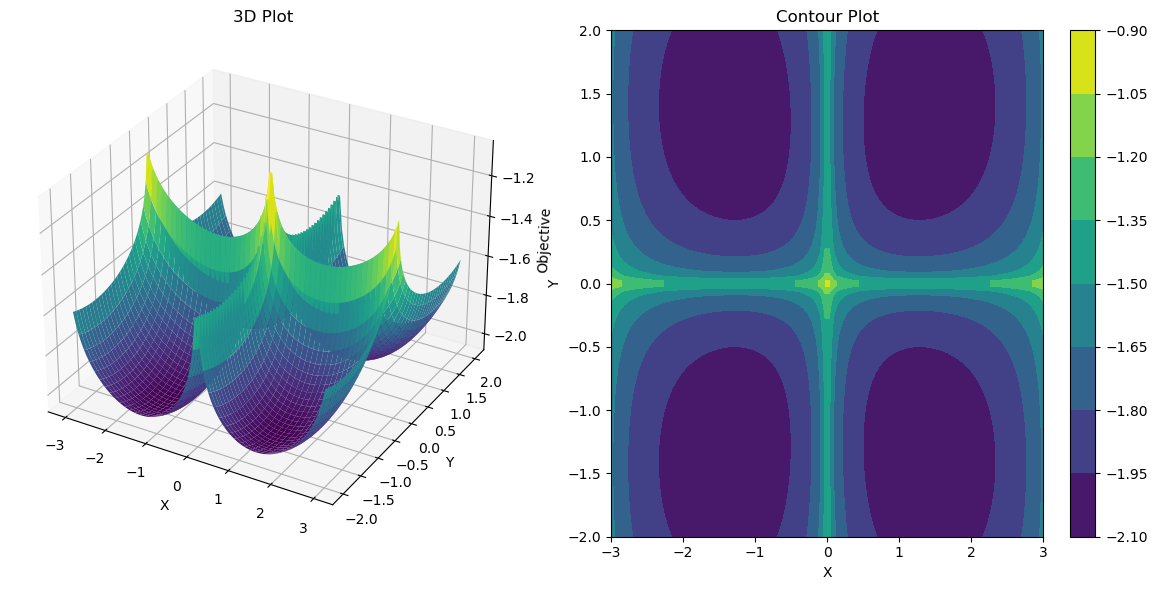

In [6]:
plot_objective(cross_in_tray, x_range=(-3, 3), y_range=(-2, 2), num_points=100)

### Schaffer’s F7 Function

$$f = \left( \frac{1}{D - 1} \sum_{i=1}^{D-1} \sqrt{y_i} + \sqrt{y_{i+1}} + \sin^2 \left(50 \cdot \sqrt{y_i}^{0.2}\right) \right)^2,
$$
$$
y_i = \sqrt{x_i^2 + x_{i+1}^2}$$

$$$$

Schaffer's F7 function has 1 global minimum located at $x=(0,0)$

In [7]:
def schaffers_f7(x):
    D = len(x)
    result = 0
    for i in range(D-1):
        yi = np.sqrt(x[i]**2 + x[i+1]**2)
        term = np.sqrt(yi) + np.sqrt(yi) + np.sin(50 * (yi**0.2))**2
        result += term
    result = (1 / (D - 1)) * result
    return result**2

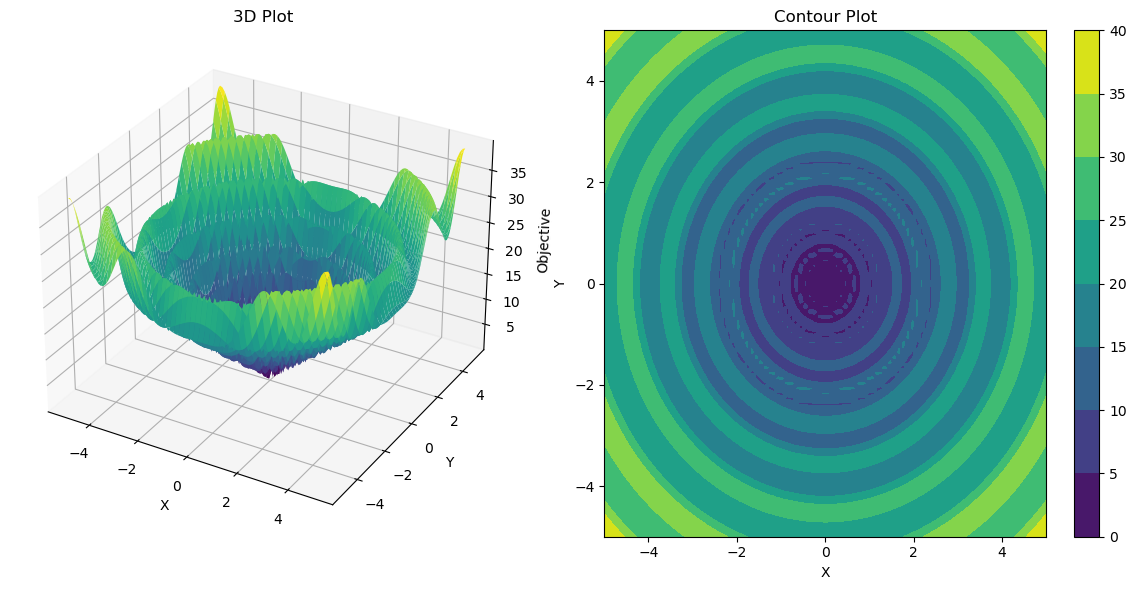

In [8]:
plot_objective(schaffers_f7, x_range=(-5, 5), y_range=(-5, 5), num_points=100)

### Levy Function

$$f = \sin^2(\pi w_1) + \sum_{i=1}^{d-1} (w_i - 1)^2 [1 + 10 \sin^2(\pi w_i + 1)] + (w_d - 1)^2 [1 + \sin^2(2\pi w_d)],
$$
$$w_i = 1 + \frac{x_i - 1}{4}$$
$$$$

The Levy function has 1 global minimum located at $x=(1,1)$

In [9]:
def levy(x):
    x = np.asarray(x)
    d = len(x)
    w = 1 + (x - 1) / 4
    term1 = np.sin(np.pi * w[0])**2
    term2 = np.sum((w[:-1] - 1)**2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1)**2))
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)
    return term1 + term2 + term3

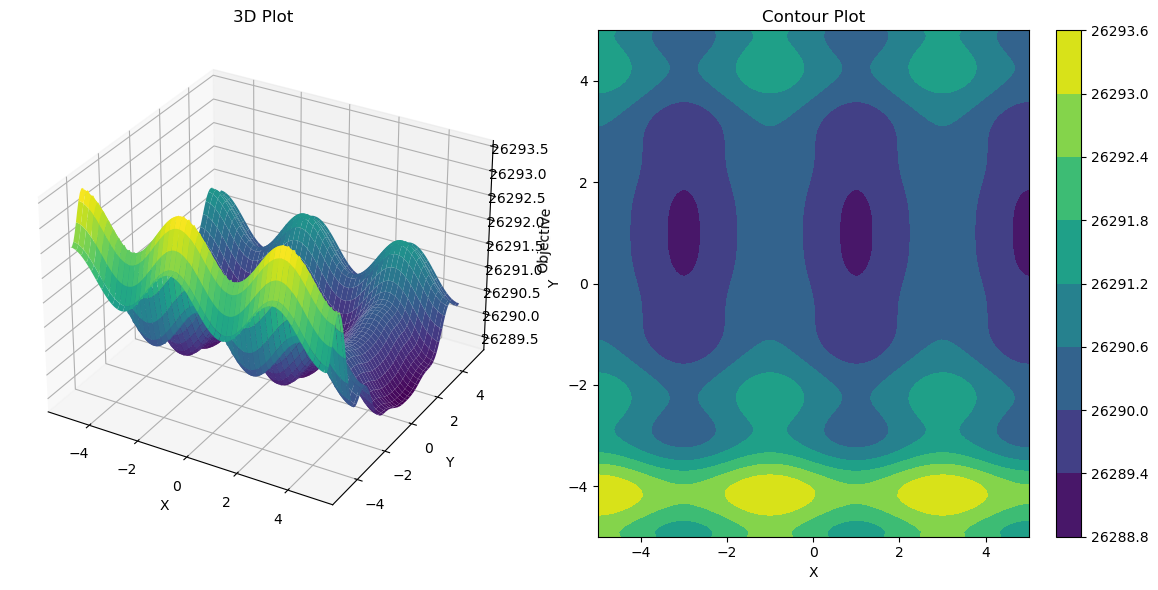

In [10]:
plot_objective(levy, x_range=(-5, 5), y_range=(-5, 5), num_points=100)

### Rastrigin Function

$$f = \sum_{i=1}^{D} \left( \left( \boldsymbol{x}_i^2 - 10 \cdot \cos \left(2\pi \cdot \boldsymbol{x}_i\right) + 10 \right) \right)$$

$$$$

The Rastrigin function has 1 global minimum at $x=(0,0)$

In [11]:
def rastrigin(x):
    D = len(x)
    result = 0
    for i in range(D):
        term = x[i]**2 - 10 * np.cos(2 * np.pi * x[i]) + 10
        result += term
    return result

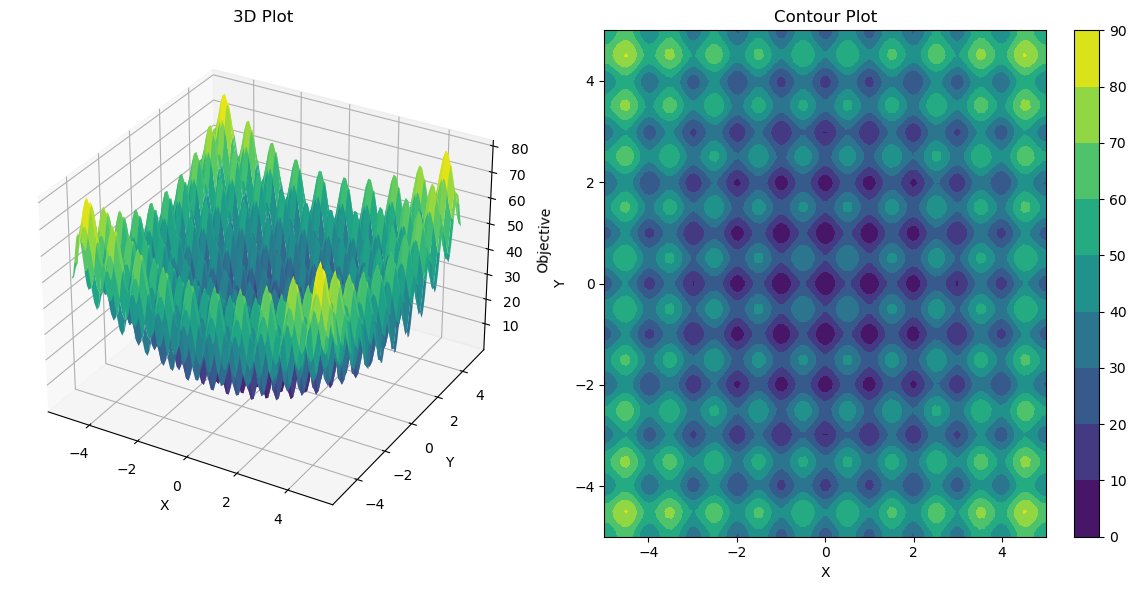

In [12]:
plot_objective(rastrigin, x_range=(-5, 5), y_range=(-5, 5), num_points=100)

### Michalewicz Function
$$f = - \sum_{i=1}^{n} \sin(x_i) \sin^{2m} \left( \frac{i \cdot x_i^2}{\pi} \right)$$
$$$$

In it's 2 dimentional form the Michalewicz function has 1 global minimum at $x=(2.20,1.57)$

In [13]:
def michalewicz(x, m=10):
    n = len(x)
    result = 0
    for i in range(n):
        result -= np.sin(x[i]) * np.sin((i + 1) * x[i]**2 / np.pi)**(2 * m)
    return result

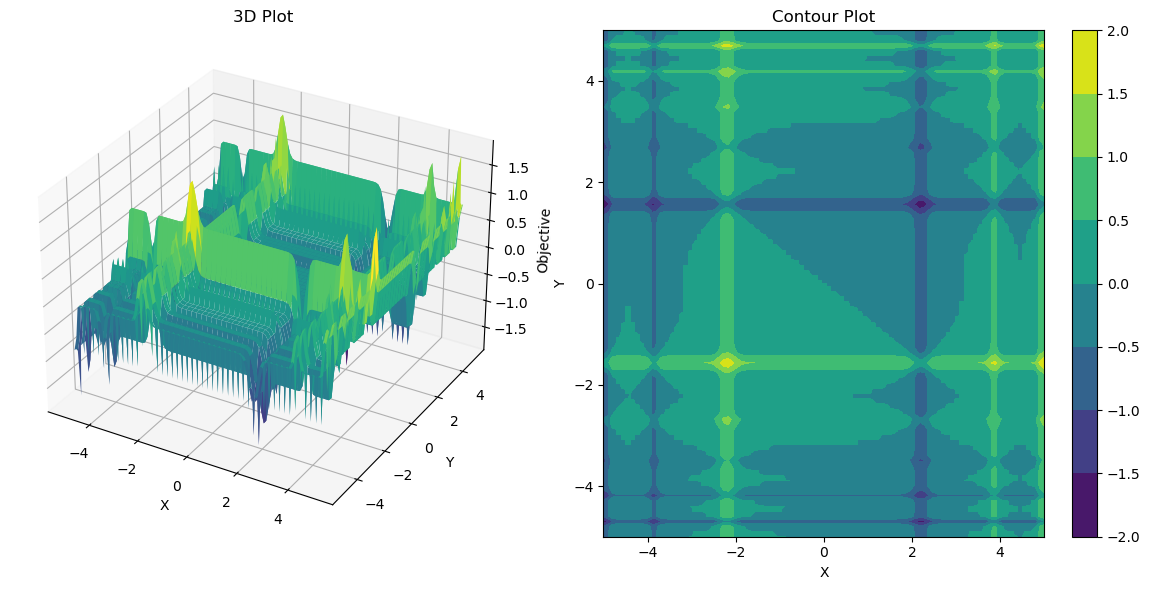

In [14]:
plot_objective(michalewicz, x_range=(-5, 5), y_range=(-5, 5), num_points=100)

### Easom Function (Optimzation Hell)
$$f= - \cos(x_0) \cos(x_1) \exp \left( - \left( (x_0 - \pi)^2 + (x_1 - \pi)^2 \right) \right)$$
$$$$

The Eason function has 1 global minimum at $x=(\pi, \pi)$

In [15]:
def easom(x):
    return -np.cos(x[0]) * np.cos(x[1]) * np.exp(-((x[0] - np.pi)**2 + (x[1] - np.pi)**2))

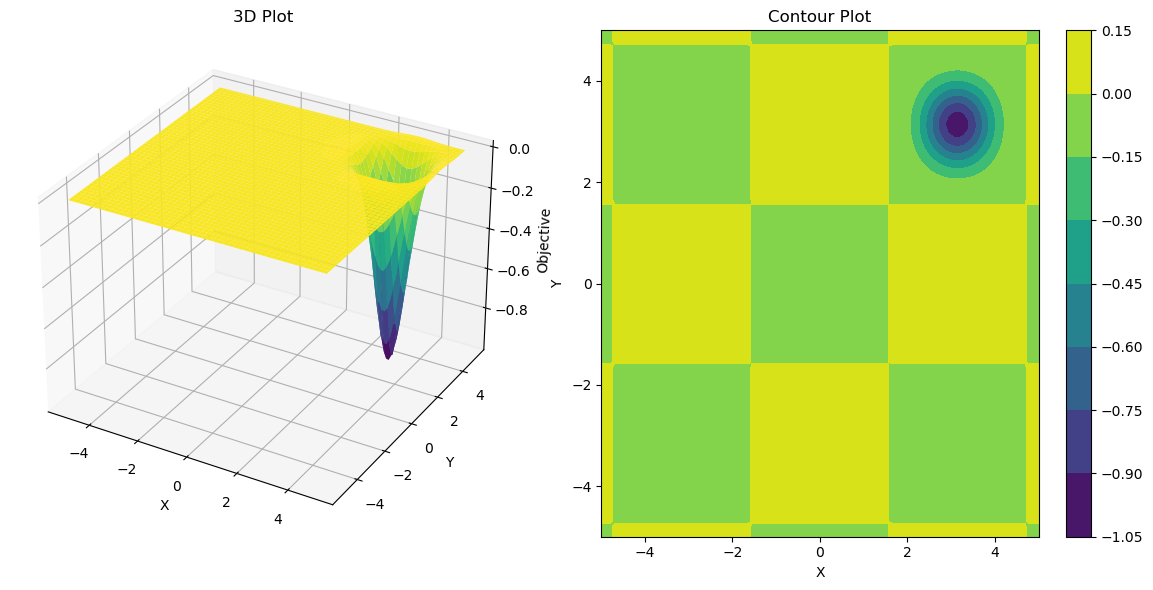

In [16]:
plot_objective(easom, x_range=(-5, 5), y_range=(-5, 5), num_points=100)

### *Initialization

For the algorithms described we provide 2 possible initializations for a population:
* A random initialization
* A grid initialization

The differences between the initializations can be observed below

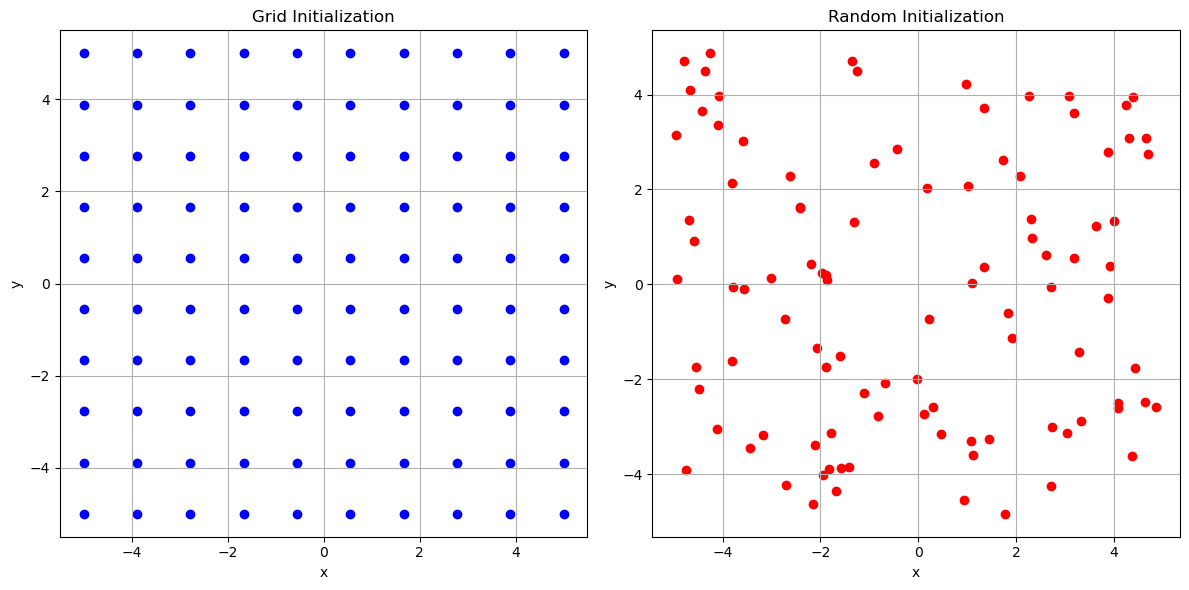

In [17]:
# Grid vs Random
def grid_initialization(val, pop_size):
    bounds = np.array([(-val, val), (-val, val)])
    dimensions = bounds.shape[0]
    grid_size = int(np.ceil(pop_size ** (1 / dimensions)))
    grid = np.meshgrid(*[np.linspace(bounds[i, 0], bounds[i, 1], grid_size) for i in range(dimensions)])
    population = np.array([grid[i].reshape(-1) for i in range(dimensions)]).T[:pop_size]
    return population
    

def random_initialization(val, pop_size):
    bounds = np.array([(-val, val), (-val, val)])
    np.random.seed(seed)
    population = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(pop_size, bounds.shape[0]))
    return population
    

def plot_comparison(val, pop_size):
    grid_pop = grid_initialization(val, pop_size)
    random_pop = random_initialization(val, pop_size)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(grid_pop[:, 0], grid_pop[:, 1], color='blue', marker='o')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Grid Initialization')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(random_pop[:, 0], random_pop[:, 1], color='red', marker='o')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Random Initialization')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

val = 5
pop_size = 100
seed = 42
plot_comparison(val, pop_size)

# Differential Evolution Algorithm

The algorithm is implemented as follows

> Let $ \mathbf{x} \in \mathbb{R}^n $ designate a candidate solution (agent) in the population. The basic DE algorithm can then be described as follows:
>
> - Choose the parameters $ NP \geq 4 $, $ CR \in [0, 1] $, and $ F \in [0, 2] $:
>    - $ NP $ is the population size, i.e., the number of candidate agents or "parents"; a typical setting is $ 10n $.
>    - The parameter $ CR \in [0, 1] $ is called the crossover probability, and the parameter $ F \in [0, 2] $ is called the differential weight. Typical settings are $ CR = 0.9 $ and $ F = 0.8 $.
>    - Optimization performance may be greatly impacted by these choices; see below.
> - Initialize all agents $ \mathbf{x} $ with random positions in the search-space.
> - Until a termination criterion is met (e.g., number of iterations performed, or adequate fitness reached), repeat the following:
>    - For each agent $ \mathbf{x} $ in the population do:
>       - Pick three agents $ \mathbf{a} $, $ \mathbf{b} $, and $ \mathbf{c} $ from the population at random, they must be distinct from each other as well as from agent $ \mathbf{x} $. ($ \mathbf{a} $ is called the "base" vector.)
>       - Pick a random index $ R \in \{1, \ldots, n\} $ where $ n $ is the dimensionality of the problem being optimized.
>       - Compute the agent's potentially new position $ \mathbf{y} = [y_1, \ldots, y_n] $ as follows:
>          - For each $ i \in \{1, \ldots, n\} $, pick a uniformly distributed random number $ r_i \sim U(0, 1) $.
>          - If $ r_i < CR $ or $ i = R $, then set $ y_i = a_i + F \times (b_i - c_i) $; otherwise, set $ y_i = x_i $. (Index position $ R $ is replaced for certain.)
>       - If $ f(\mathbf{y}) \leq f(\mathbf{x}) $, then replace the agent $ \mathbf{x} $ in the population with the improved or equal candidate solution $ \mathbf{y} $.
> - Pick the agent from the population that has the best fitness and return it as the best-found candidate solution.



Algorithm discription taken from [the Wikipedia article on Differential Evolution](https://en.wikipedia.org/wiki/Differential_evolution)


In [61]:
# Differential Evolution Implementation
def differential_evolution(objective, bounds, pop_size=100, iter=200, F=0.5, CR=0.8, initialization=0, seed=42):

    np.random.seed(seed)
    
    if initialization == 0:
        population = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(pop_size, bounds.shape[0]))
    if initialization == 1:
        dimensions = bounds.shape[0]
        grid_size = int(np.ceil(pop_size ** (1 / dimensions)))
        grid = np.meshgrid(*[np.linspace(bounds[i, 0], bounds[i, 1], grid_size) for i in range(dimensions)])
        population = np.array([grid[i].reshape(-1) for i in range(dimensions)]).T[:pop_size]

    history = {}
    
    for gen in range(iter):
        for i in range(pop_size):
            candidates = [ind for ind in range(pop_size) if ind != i]
            a, b, c = population[np.random.choice(candidates, 3, replace=False)]
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, bounds[:, 0], bounds[:, 1])
            cross_points = np.random.rand(bounds.shape[0]) < CR
            trial = np.where(cross_points, mutant, population[i])
            trial_obj = objective(trial)
            current_obj = objective(population[i])
            if trial_obj < current_obj:
                population[i] = trial
    
        best_index = np.argmin([objective(ind) for ind in population])
        best_solution = population[best_index]
        history[gen] = best_solution
        best_fitness = objective(best_solution)
    
    return population, best_solution, best_fitness, history

In [84]:
# Interface Setup

style = {'description_width': 'initial'}

seed_picker = widgets.IntText(
    value=42,
    description='Seed:',
    disabled=False
)

benchmark_picker = widgets.Dropdown(
    options=[('Ackley','ackley'), ('Cross-in-Tray','cross_in_tray'), ('Schaffers F7','schaffers_f7'),
     ('Levy','levy'), ('Rastrigin','rastrigin'), ('Michalewicz','michalewicz'), ('Easom', 'easom')],
    value='ackley',
    description='Benckmark Function:',
    disabled=False,
    style=style
)

initialization_picker = widgets.Dropdown(
    options=[('Random', 0), ('Grid', 1)],
    value=0,
    description='Initialization:',
    disabled=False
)

search_space_picker = widgets.IntSlider(
    value=5,
    min=1,
    max=100,
    step=5,
    description='Search Space Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

population_size_picker = widgets.IntSlider(
    value=50,
    min=20,
    max=500,
    step=20,
    description='Population Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

generation_picker = widgets.BoundedIntText(
    value=20,
    min=10,
    max=200,
    step=1,
    description='Total Generations:',
    disabled=False,
    style=style
)


F_picker = widgets.FloatSlider(
    value=0.5,
    min=0.001,
    max=2,
    step=0.01,
    description='F Value:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

CR_picker = widgets.FloatSlider(
    value=0.9,
    min=0.001,
    max=1,
    step=0.01,
    description='Crossover rate (CR):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    style=style
)


out = widgets.Output()

def de_visualize(b=None):

  # getting values from pickers
  seed = seed_picker.value
  if benchmark_picker.value in globals():
    objective = globals()[benchmark_picker.value]
  val = search_space_picker.value
  bounds = np.array([(-val, val), (-val, val)])
  pop_size = population_size_picker.value
  initialization = initialization_picker.value
  total_generations = generation_picker.value
  F = F_picker.value
  CR = CR_picker.value

  generation_indices = np.linspace(0, total_generations - 1, 6, dtype=int)
  if total_generations - 1 not in generation_indices:
      generation_indices[-1] = total_generations - 1


  # plotting
  with out:
    clear_output(wait=True)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Population Distribution over Generations', fontsize=22)
    for i, ax in enumerate(axes.flat):
          generation = generation_indices[i]

          # run algorithms with user parameters for the current generation
          population, best_solution, best_fitness, history = differential_evolution(objective=objective, bounds=bounds,
                                                                    pop_size=pop_size, iter=generation + 1,
                                                                    F=F, CR=CR, initialization=initialization,
                                                                    seed=seed)
          # cenerate contour plot for the current generation
          x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
          y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
          X, Y = np.meshgrid(x, y)
          Z = objective(np.array([X, Y]))

          ax.contourf(X, Y, Z, levels=50, cmap='viridis')
          ax.scatter(population[:, 0], population[:, 1], color='blue', label='Population')
          if best_solution is not None:
              ax.scatter(best_solution[0], best_solution[1], color='red', label='Best Solution')
          ax.set_xlabel('X')
          ax.set_ylabel('Y')
          ax.set_title(f'Generation {generation + 1}')
    plt.show()


button = widgets.Button(description="Update Plot")
button.on_click(de_visualize)

# sectioning widgets
tab1 = VBox(children=[benchmark_picker,
                      initialization_picker,
                      seed_picker,
                      search_space_picker,
                      population_size_picker,
                      generation_picker,
                      ])
tab2 = VBox(children=[F_picker,
                      CR_picker,
                      ])

tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Population Settings')
tab.set_title(1, 'Algorithm Settings')
VBox(children=[tab, button, out])

# Genetic Algorithm

The algorithm can be described as follows:

* A candidate solution is represented using an array of some data type. This candidate solution is represents an individual.
* An intial population of $P$ individuals is generated (may be random or otherwise).
* For each sucessive generation a portion of the existing population is selected to reproduce for a new generation. Individual solutions are selected through a fitness-based process, where fitter solutions (as measured by a fitness function) are typically more likely to be selected.
* A second generation population of solutions is generated from those selected, through a combination of genetic operators: crossover (also called recombination), and mutation. 
* This generational process is repeated until a termination condition has been reached. Common terminating conditions are:

    * A solution is found that satisfies minimum criteria
    * Fixed number of generations reached

There are many possible representations for a candidate solution. However, for our demonstration we will use represent condidate solutions as an array of floating point variables (a vector). This representation is well suited to the optimization domain.

For the floating point representation there are many possible combinations of mutation, crossover, and selection operators. We will only consider the following:

* Mutation operators:
    - Non-Uniform mutation
    - Self-Adaptive mutation*

* Crossover operators:
    - Single arithmetic combination
    - Whole arithmetic combination
    - Blend crossover
    - Multiparent recombination (underlying operator is arithmetic crossover)

* Selection operators:
    - Elitism (survivor selection)
    - Tournament selection (parent selection)
    - GENITOR (survivor selection)
    - Over-selection (parent selection)**


A more in-depth explinations for the algorithm can be found at the [genetic algorithm Wikipedia article](https://en.wikipedia.org/wiki/Genetic_algorithm)

*our version of Self-Adaptive mutation is not the standard one (where the mutation rate is evolved with the population), we instead propose a new strategy that considers space using cosine similarity. From our experiments we suggest this feature to be used in conjunction with elitism.

**for large populations only (>1000)


In [20]:
# Operators Implementation

# mutation
def non_uniform(population, mutation_rate, mutation_step_size=1):
    mutated_pop = []
    for indv in population:
        mutated = []
        for gene in indv:
            r = np.random.uniform(0,1)
            mutate = True if r < mutation_rate else False
            if mutate:
                mutation = np.random.normal(0, mutation_step_size)
                mutated_gene = gene + mutation
            else:
                mutated_gene = gene
            mutated.append(mutated_gene)
        mutated_pop.append(mutated)
    return np.array(mutated_pop)


def self_adaptive(population, mutation_rate, adapted_mutation_step_size, similarity_threshold=0.7):
    avg_similarity = np.mean(cosine_similarity_matrix(population))
    if avg_similarity > similarity_threshold:
        adapted_mutation_step_size += np.random.uniform(0.1,0.5)
    else:
        adapted_mutation_step_size -= np.random.uniform(0.05,0.15)

    mutated_pop = []
    for indv in population:
        mutated = []
        for gene in indv:
            r = np.random.uniform(0,1)
            mutate = True if r < mutation_rate else False
            if mutate:
                mutation = np.random.normal(0, adapted_mutation_step_size)
                mutated_gene = gene + mutation
            else:
                mutated_gene = gene
            mutated.append(mutated_gene)
        mutated_pop.append(mutated)
    return np.array(mutated_pop), adapted_mutation_step_size

          
def cosine_similarity_matrix(population):
    vectors = np.array(population)
    dot_product = np.dot(vectors, vectors.T)
    magnitude = np.linalg.norm(vectors, axis=1)
    magnitude_product = np.outer(magnitude, magnitude)
    similarity_matrix = dot_product / magnitude_product
    return similarity_matrix

# crossover
def single_arithmetic(population, crossover_rate):
    gene_length = population.shape[1]

    parent_pairs = []
    for i in range (len(population)):
        parents_indices = np.random.choice(len(population), size=2, replace=False)
        selected_parents = population[parents_indices]
        parent_pairs.append(selected_parents)

    children = []
    for parent_pair in parent_pairs:
        k = np.random.randint(gene_length)
        mask = np.zeros(gene_length, dtype=bool) 
        mask[k] = True

        parent1 = parent_pair[0]
        parent2 = parent_pair[1]

        child1 = np.where(mask, (parent1 * crossover_rate) + (1 - crossover_rate) * parent2, parent1)
        child2 = np.where(mask, (parent1 * crossover_rate) + (1 - crossover_rate) * parent1, parent2)

        children.append(child1)
        children.append(child2)

    return np.array(children)

def whole_arithmetic(population, crossover_rate):
    parent_pairs = []
    for i in range (len(population)):
        parents_indices = np.random.choice(len(population), size=2, replace=False)
        selected_parents = population[parents_indices]
        parent_pairs.append(selected_parents)
        
    children = []
    for parent_pair in parent_pairs:
        parent1 = parent_pair[0]
        parent2 = parent_pair[1]

        child = (parent1 * crossover_rate) + (1 - crossover_rate) * parent2

        children.append(child)

    return np.array(children)


def blend(population, crossover_rate):
    parent_pairs = []
    for i in range (len(population)):
        parents_indices = np.random.choice(len(population), size=2, replace=False)
        selected_parents = population[parents_indices]
        parent_pairs.append(selected_parents)
        
    children = []
    for parent_pair in parent_pairs:
        parent1 = parent_pair[0]
        parent2 = parent_pair[1]
        
        u = np.random.uniform(0, 1)
        gamma = ((1 - (2 * crossover_rate)) * u) - crossover_rate
        child = ((1 - gamma) * parent1) + (gamma * parent2)
        children.append(child)

    return np.array(children)

def multiparent(population, crossover_rate, num_parents):
    parent_pairs = []

    for i in range (len(population)):
        parents_indices = np.random.choice(len(population), size=num_parents, replace=False)
        selected_parents = population[parents_indices]
        parent_pairs.append(selected_parents)
        
    children = []
    weights = np.full(num_parents, crossover_rate)
    for parent_pair in parent_pairs:
        child = np.average(parent_pair, axis=0, weights=weights)
        children.append(child)

    return np.array(children)

# selection
def get_elite(population, fitness):
    sorted_indices = np.argsort(fitness)
    elite = population[sorted_indices[:3]]
    return np.array(elite)

def tournament(population, fitness, k):
    selected_indices = set() 
    winners = []

    while len(winners) <= len(population) // k:
        selected_indices = np.random.choice(len(population), size=k, replace=False)
        tournament_pair = population[selected_indices]
        competitor_fitness = [fitness[index] for index in selected_indices]
        winner_index = np.argmin(competitor_fitness)
        winner = tournament_pair[winner_index]
        winners.append(winner)

    return np.array(winners)
        

def genitor(population, children, fitness):
    sorted_indices = np.argsort(fitness)
    new_population = population[sorted_indices[:-len(children)]]
    new_population = np.concatenate((new_population, children))
    
    return new_population

def over_selection(population, fitness, k=None):
    pop_size = len(population)
    
    if pop_size >= 1000 and pop_size < 2000:
        x = 0.32
    elif pop_size >= 2000 and pop_size < 4000:
        x = 0.16
    elif pop_size >= 4000 and pop_size < 8000:
        x = 0.08
    elif pop_size >= 8000:
        x = 0.04
    else:
        raise ValueError("Population size must be at least 1000")
    
    num_fitter = int(pop_size * x)
    sorted_indices = np.argsort(fitness)
    fitter_group = sorted_indices[:num_fitter]
    less_fitter_group = sorted_indices[num_fitter:]
    
    parents = []
    num_parents_fitter = int(0.8 * len(fitter_group))
    parents.extend(np.random.choice(fitter_group, size=num_parents_fitter, replace=False))
    num_parents_less_fitter = int(0.2 * len(less_fitter_group))
    parents.extend(np.random.choice(less_fitter_group, size=num_parents_less_fitter, replace=False))
    
    return population[parents]



In [21]:
# Gentic Algorithm Implementation
def genetic_algorithm(objective, bounds, pop_size=100, iter=200, initialization=0, seed=42,
                      mutation=non_uniform, mutation_rate=0.3, mutation_step_size=1,
                      crossover=whole_arithmetic, crossover_rate=0.7, num_parents=2,
                      parent_selection=tournament, survivor_selection=genitor, k=3, 
                      elitism=False):
    
    np.random.seed(seed)
  
    if initialization == 0:
        population = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(pop_size, bounds.shape[0]))
    if initialization == 1:
        dimensions = bounds.shape[0]
        grid_size = int(np.ceil(pop_size ** (1 / dimensions)))
        grid = np.meshgrid(*[np.linspace(bounds[i, 0], bounds[i, 1], grid_size) for i in range(dimensions)])
        population = np.array([grid[i].reshape(-1) for i in range(dimensions)]).T[:pop_size]

    adapted_mutation_step_size = 1
    history = {}

    for gen in range(iter):
        fitness = np.array([objective(ind) for ind in population])

        if elitism:
            elite = get_elite(population, fitness)
        parents = parent_selection(population, fitness, k)

        if num_parents > 2 and crossover != multiparent:
            raise ValueError("Must use multiparent crossover when number of parents is greater then 2")
        if num_parents > 2: 
            children = crossover(parents, crossover_rate, num_parents)
        else:
            children = crossover(parents, crossover_rate)

        if mutation == self_adaptive:
            mutated, adapted_mutation_rate = self_adaptive(children, mutation_rate, adapted_mutation_step_size, 0.7)
        else:
            mutated = np.clip(mutation(children, mutation_rate, mutation_step_size), bounds[:, 0], bounds[:, 1])
        
        new_generation = survivor_selection(population, mutated, fitness)

        if elitism:
            new_generation = np.concatenate((new_generation, elite))

        population = new_generation

        fitness = np.array([objective(ind) for ind in population])

        best_index = np.argmin([objective(ind) for ind in population])
        best_solution = population[best_index]
        history[gen] = best_solution
        best_fitness = objective(best_solution)
        
    return population, best_solution, best_fitness, history

In [22]:
# Interface Setup
ga_seed_picker = widgets.IntText(
    value=42,
    description='Seed:',
    disabled=False
)

ga_benchmark_picker = widgets.Dropdown(
    options=[('Ackley','ackley'), ('Cross-in-Tray','cross_in_tray'), ('Schaffers F7','schaffers_f7'),
     ('Levy','levy'), ('Rastrigin','rastrigin'), ('Michalewicz','michalewicz'), ('Easom', 'easom')],
    value='ackley',
    description='Benckmark Function:',
    disabled=False,
    style=style
)

ga_initialization_picker = widgets.Dropdown(
    options=[('Random', 0), ('Grid', 1)],
    value=0,
    description='Initialization:',
    disabled=False
)

ga_search_space_picker = widgets.IntSlider(
    value=5,
    min=1,
    max=50,
    step=2,
    description='Search Space Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

ga_population_size_picker = widgets.IntSlider(
    value=50,
    min=20,
    max=5000,
    step=20,
    description='Population Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

ga_generation_picker = widgets.BoundedIntText(
    value=20,
    min=10,
    max=200,
    step=1,
    description='Total Generations:',
    disabled=False,
    style=style
)

mutation_picker = widgets.Dropdown(
    options=[('Non-Uniform','non_uniform'), ('Self Adaptive','self_adaptive')],
    value='non_uniform',
    description='Mutation Operator:',
    disabled=False,
    style=style
)

mutation_rate_picker = widgets.FloatSlider(
    value=0.2,
    min=0.001,
    max=1,
    step=0.01,
    description='Mutation Rate:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    style=style
)

mutation_step_size_picker = widgets.FloatSlider(
    value=0.1,
    min=0.001,
    max=3,
    step=0.01,
    description='Mutation Step Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    style=style
)

crossover_picker = widgets.Dropdown(
    options=[('Single Arithmetic','single_arithmetic'), ('Whole Arithmetic','whole_arithmetic'), ('Multi-Parent', 'multiparent')],
    value='whole_arithmetic',
    description='Crossover Operator:',
    disabled=False,
    style=style
)

num_parents_picker = widgets.IntText(
    value=2,
    description='Number of Parents:',
    disabled=False,
    style=style
)

crossover_rate_picker = widgets.FloatSlider(
    value=0.9,
    min=0.001,
    max=1,
    step=0.01,
    description='Crossover Rate:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    style=style
)

parent_selection_picker = widgets.Dropdown(
    options=[('Tournament','tournament'), ("Over-Selection", "over_selection")],
    value='tournament',
    description='Parent Selection:',
    disabled=False,
    style=style
)

k_picker = widgets.IntText(
    value=3,
    description='K (tournament):',
    disabled=False,
    style=style
)

survivor_selection_picker = widgets.Dropdown(
    options=[('GENITOR/Replace Worst','genitor')],
    value='genitor',
    description='Survivor Selection:',
    disabled=False,
    style=style
)

elitism_picker = widgets.Checkbox(
    value=False,
    description='Elitism',
    disabled=False,
    indent=False
)

ga_out = widgets.Output()

def ga_visualize(b=None):

  # getting values from pickers
  seed = ga_seed_picker.value
  if ga_benchmark_picker.value in globals():
    objective = globals()[ga_benchmark_picker.value]
  val = ga_search_space_picker.value
  bounds = np.array([(-val, val), (-val, val)])
  pop_size = ga_population_size_picker.value
  initialization = ga_initialization_picker.value
  total_generations = ga_generation_picker.value
  generation_indices = np.linspace(0, total_generations - 1, 6, dtype=int)
  if total_generations - 1 not in generation_indices:
    generation_indices[-1] = total_generations - 1
  if mutation_picker.value in globals():
    mutation = globals()[mutation_picker.value]
  mutation_rate = mutation_rate_picker.value
  mutation_step_size = mutation_step_size_picker.value
  if crossover_picker.value in globals():
    crossover = globals()[crossover_picker.value]
  num_parents = num_parents_picker.value
  crossover_rate = crossover_rate_picker.value
  if parent_selection_picker.value in globals():
    parent_selection = globals()[parent_selection_picker.value]
  k = k_picker.value
  if survivor_selection_picker.value in globals():
    survivor_selection = globals()[survivor_selection_picker.value]
  elitism = elitism_picker.value



  # plotting
  with ga_out:
    clear_output(wait=True)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Population Distribution over Generations', fontsize=22)
    for i, ax in enumerate(axes.flat):
          generation = generation_indices[i]

          # run algorithms with user parameters for the current generation
          population, best_solution, best_fitness, history = genetic_algorithm(objective, bounds, pop_size=pop_size, iter=generation + 1, initialization=initialization,
                                                                       seed=seed,mutation=mutation, mutation_rate=mutation_rate, mutation_step_size=mutation_step_size,
                                                                       crossover=crossover, crossover_rate=crossover_rate, num_parents=num_parents, parent_selection=parent_selection, 
                                                                       survivor_selection=survivor_selection, k=k, elitism=elitism)

          # cenerate contour plot for the current generation
          x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
          y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
          X, Y = np.meshgrid(x, y)
          Z = objective(np.array([X, Y]))

          ax.contourf(X, Y, Z, levels=50, cmap='viridis')
          ax.scatter(population[:, 0], population[:, 1], color='blue', label='Population')
          if best_solution is not None:
              ax.scatter(best_solution[0], best_solution[1], color='red', label='Best Solution')
          ax.set_xlabel('X')
          ax.set_ylabel('Y')
          ax.set_title(f'Generation {generation + 1}')
    plt.show()


ga_button = widgets.Button(description="Update Plot")
ga_button.on_click(ga_visualize)

# sectioning widgets
tab3 = VBox(children=[ga_benchmark_picker,
                      ga_initialization_picker,
                      ga_seed_picker,
                      ga_search_space_picker,
                      ga_population_size_picker,
                      ga_generation_picker,
                      ])
tab4 = VBox(children=[mutation_picker,
                      mutation_rate_picker,
                      mutation_step_size_picker,
                      crossover_picker,
                      num_parents_picker,
                      crossover_rate_picker,
                      parent_selection_picker,
                      k_picker,
                      survivor_selection_picker,
                      elitism_picker,
                      ])

ga_tab = widgets.Tab(children=[tab3, tab4])
ga_tab.set_title(0, 'Population Settings')
ga_tab.set_title(1, 'Algorithm Settings')
VBox(children=[ga_tab, ga_button, ga_out])

# Comparison

In this comparison, we evaluate the performance of the above algorithms, across seven different fitness functions. The goal is to find the minimum value for each fitness function (within $e^{-3}$). Both algorithms will be tested with various hyperparameter combinations.

## Fitness Functions

1. Ackley
2. Cross-in-Tray
3. Schaffers F7
4. Levy
5. Rastrigin
6. Michalewicz
7. Easom

## Hyperparameters

### Shared Hyperparameters
- **Seed: 42**
- **Search Space: 100**
- **Generations: 200**
- Population Size
- Initialization (Grid or Random)

### Differential Evolution (DE) Hyperparameters
- F-value
- CR (Crossover Rate)

### Genetic Algorithm (GA) Hyperparameters
- Mutation Operator (Non-uniform, Self-adaptive)
- Mutation Rate
- Mutation Step Size
- Number of Parents
- Crossover Operator (Whole Arithmetic, Single Arithmetic, Multiparent)
- Crossover Rate
- Parent Selection (Tournament, Over-selection)
- K 
- Survivor Selection (Genitor)
- Elitism (True, False)

### Combinations for Testing 

Each combination will be tested against the 7 fitness funtions

#### Differential Evolution (DE)

| Combination | Population Size | Initialization  | F-value | CR  |
|-------------|-----------------|-----------------|---------|-----|
| 1           | 20            | Grid            | 0.5     | 0.9 |
| 2           | 30             | Random          | 0.8     | 0.7 |
| 3           | 40             | Grid            | 0.6     | 0.8 |
| 4           | 60             | Random          | 0.7     | 0.6 |
| 5           | 100             | Grid            | 0.9     | 0.5 |
| 6           | 20             | Random          | 0.4     | 0.4 |
| 7           | 40             | Grid            | 0.3     | 0.3 |
| 8           | 50             | Random          | 0.7     | 0.5 |
| 9           | 60             | Grid            | 0.6     | 0.7 |
| 10          | 40             | Random          | 0.5     | 0.6 |


#### Gentic Algorithm (GA)

| Combination | Population Size | Initialization | Mutation Operator | Mutation Rate | Mutation Step Size | Number of Parents | Crossover Operator | Crossover Rate | Parent Selection | K | Survivor Selection | Elitism |
|-------------|-----------------|-----------------|-------------------|---------------|--------------------|-------------------|--------------------|----------------|------------------|---|-------------------|---------|
| 1           | 100           | Grid            | Non-uniform       | 0.1           | 0.7                | 2               | Whole Arithmetic  | 0.2            | Tournament       | 3| Genitor           | Enabled |
| 2           | 350          | Random          | Non-uniform       | 0.4        | 1.1             | 2             | Single Arithmetic | 0.5         | Tournament       | 5 | Genitor         | Enabled |
| 3           | 1100           | Grid            | Non-uniform       | 0.7          | 3.2               | 4              | Multiparent       | 0.9           | Over-selection   | N/A | Genitor          | Enabled |
| 4           | 450          | Random          | Non-uniform       | 0.3        | 0.9             | 5              | Multiparent       | 0.6         | Tournament       | 4 | Genitor         | Enabled |
| 5           | 700          | Grid            | Self-adaptive     | 0.2           | N/A                | 2               | Whole Arithmetic  | 0.3            | Tournament       | 2 | Genitor           | Disabled |
| 6           | 1500           | Random          | Self-adaptive     | 0.6        | N/A                | 2             | Single Arithmetic | 0.7         | Over-selection       | N/A | Genitor        | Disabled |
| 7           | 2000           | Grid            | Self-adaptive     | 0.8          | N/A                | 4              | Multiparent       | 0.8           | Over-selection       | N/A | Genitor          | Disabled |
| 8           | 3000           | Random          | Self-adaptive     | 0.7          | N/A                | 3              | Multiparent       | 0.9           | Over-selection       | N/A | Genitor          | Disabled |
| 9           | 550          | Random          | Non-uniform       | 0.1           | 0.4                | 2               | Whole Arithmetic  | 0.2            | Tournament      | 4 | Genitor           | Enabled |
| 10          | 100           | Grid            | Non-uniform       | 0.4        | 1.5             | 2             | Single Arithmetic | 0.4         | Tournament       | 5 | Genitor         | Enabled |
| 11          | 1000           | Random          | Non-uniform       | 0.7          | 2.7               | 4              | Multiparent       | 0.8           | Over-selection       | N/A | Genitor          | Enabled |
| 12          | 400          | Grid            | Non-uniform       | 0.3           | 0.5                | 5              | Multiparent       | 0.2            | Tournament       | 3 | Genitor           | Enabled |
| 13          | 500          | Random          | Self-adaptive     | 0.5        | N/A                | 2               | Whole Arithmetic  | 0.3            | Tournament       | 3 | Genitor           | Disabled |
| 14          | 2500           | Grid            | Self-adaptive     | 0.8          | N/A                | 3             | Multiparent | 0.6         | Over-selection       | N/A | Genitor         | Disabled |
| 15          | 50           | Random          | Self-adaptive     | 0.3           | N/A                | 4              | Multiparent       | 0.8           | Tournament       | 9 | Genitor          | Disabled |
| 16          | 2750           | Grid            | Non-uniform       | 0.2          | 0.8             | 5              | Multiparent       | 0.1            | Tournament       | 3 | Genitor           | Enabled |
| 17          | 300          | Random          | Non-uniform       | 0.4        | 2.1               | 2               | Whole Arithmetic  | 0.5         | Tournament       | 6 | Genitor         | Enabled |
| 18          | 1200           | Grid            | Non-uniform       | 0.5           | 1.0             | 3             | Multiparent | 0.8           | Over-selction       | N/A | Genitor          | Enabled |
| 19          | 200           | Random          | Self-adaptive     | 0.6          | N/A                | 4              | Multiparent       | 0.3            | Tournament       | 4 | Genitor           | Disabled |
| 20          | 600          | Grid            | Self-adaptive     | 0.1           | N/A                | 5              | Multiparent       | 0.5         | Tournament       | 7 | Genitor        | Disabled |


In [90]:
# Setting up tests
de_data = {
    "Combination": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Population Size": [20, 30, 40, 60, 100, 20, 40, 50, 60, 40],
    "Initialization": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    "F-value": [0.5, 0.8, 0.6, 0.7, 0.9, 0.4, 0.3, 0.7, 0.6, 0.5],
    "CR": [0.9, 0.7, 0.8, 0.6, 0.5, 0.4, 0.3, 0.5, 0.7, 0.6]
}

ga_data = {
    "Combination": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Population Size": [100, 350, 1100, 450, 700, 1500, 2000, 3000, 550, 100, 1000, 400, 500, 2500, 50, 2750, 300, 1200, 200, 600],
    "Initialization": [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    "Mutation Operator": [non_uniform, non_uniform, non_uniform, non_uniform, self_adaptive, self_adaptive, self_adaptive, self_adaptive, non_uniform, non_uniform, non_uniform, non_uniform, self_adaptive, self_adaptive, self_adaptive, non_uniform, non_uniform, non_uniform, self_adaptive, self_adaptive],
    "Mutation Rate": [0.1, 0.4, 0.7, 0.3, 0.2, 0.6, 0.8, 0.7, 0.1, 0.4, 0.7, 0.3, 0.5, 0.8, 0.3, 0.2, 0.4, 0.5, 0.6, 0.1],
    "Mutation Step Size": [0.7, 1.1, 3.2, 0.9, None, None, None, None, 0.4, 1.5, 2.7, 0.5, None, None, None, 0.8, 2.1, 1.0, None, None],
    "Number of Parents": [2, 2, 4, 5, 2, 2, 4, 3, 2, 2, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
    "Crossover Operator": [whole_arithmetic, single_arithmetic, multiparent, multiparent, whole_arithmetic, single_arithmetic, multiparent, multiparent, whole_arithmetic, single_arithmetic, multiparent, multiparent, whole_arithmetic, multiparent, multiparent, multiparent, whole_arithmetic, multiparent, multiparent, multiparent],
    "Crossover Rate": [0.2, 0.5, 0.9, 0.6, 0.3, 0.7, 0.8, 0.9, 0.2, 0.4, 0.8, 0.2, 0.3, 0.6, 0.8, 0.1, 0.5, 0.8, 0.3, 0.5],
    "Parent Selection": [tournament, tournament, over_selection, tournament, tournament, over_selection, over_selection, over_selection, tournament, tournament, over_selection, tournament, tournament, over_selection, tournament, tournament, tournament, over_selection, tournament, tournament],
    "K": [3, 5, 0, 4, 2, 0, 0, 0, 4, 5, 0, 3, 3, 0, 9, 3, 6, 0, 4, 7],
    "Survivor Selection": [genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor, genitor],
    "Elitism": [True, True, True, True, False, False, False, False, True, True, True, True, False, False, False, True, True, True, False, False]
}

objectives = {
    'ackley': (0, 0),  
    'cross_in_tray': (1.34941, 1.34941),
    'schaffers_f7': (0, 0),
    'levy': (1, 1),  
    'rastrigin': (0, 0),  
    'michalewicz': (2.20, 1.57),  
    'easom': (np.pi, np.pi)  
}

# Create the DataFrames
de_params_df = pd.DataFrame(de_data, index=de_data['Combination'])
ga_params_df = pd.DataFrame(ga_data, index=ga_data['Combination'])


# Define test function
def ga_tester(ga_data, objectives):
    results = []
    for index, row in ga_data.iterrows():
        result={}
        params = {
            'bounds': np.array([(-100, 100), (-100, 100)]),
            'pop_size': row['Population Size'],
            'iter': 200,  
            'initialization': row['Initialization'],
            'mutation': row['Mutation Operator'],
            'mutation_rate': row['Mutation Rate'],
            'mutation_step_size': row['Mutation Step Size'],
            'crossover': row['Crossover Operator'],
            'crossover_rate': row['Crossover Rate'],
            'num_parents': row['Number of Parents'],
            'parent_selection': row['Parent Selection'],
            'survivor_selection': row['Survivor Selection'],
            'k': row['K'] if row['K'] > 0 else None,
            'elitism': row['Elitism']
        }

        result['Combination'] = int(row['Combination'])
        
        for objective, solution in objectives.items():
            population, best_solution, best_fitness, history = genetic_algorithm(globals()[objective], **params)
            for gen, candidate in history.items():
                if np.allclose(candidate, solution, atol=1e-3):
                    gen_found = gen
                    break
                gen_found = None

            result[objective] = gen_found
            
        results.append(result)
    return pd.DataFrame(results)
                           
def de_tester(ga_data, objectives):
    results = []
    for index, row in ga_data.iterrows():
        result = {}
        params = {
            'bounds': np.array([(-100, 100), (-100, 100)]),
            'pop_size': int(row['Population Size']),
            'iter': 200,  
            'initialization': row['Initialization'],
            'F': row['F-value'],
            'CR': row['CR']
        }
        result['Combination'] = int(row['Combination'])
        for objective, solution in objectives.items():
            population, best_solution, best_fitness, history = differential_evolution(globals()[objective], **params)
            for gen, candidate in history.items():
                if np.allclose(candidate, solution, atol=1e-3):
                    gen_found = gen
                    break
                gen_found = None

            result[objective] = gen_found

        results.append(result)
    return pd.DataFrame(results)
    

In [92]:
de_results = de_tester(de_params_df, objectives)

In [91]:
de_results

,Combination,ackley,cross_in_tray,schaffers_f7,levy,rastrigin,michalewicz,easom
0,1,0,NaN,0,0,0,None,0
1,2,0,NaN,1,0,0,None,0
2,3,0,0.0,0,0,0,None,0
3,4,0,0.0,0,0,0,None,0
4,5,0,164.0,7,0,0,None,0
5,6,0,NaN,0,0,0,None,0
6,7,0,NaN,0,0,0,None,0
7,8,0,8.0,39,0,0,None,0
8,9,0,1.0,0,0,0,None,0
9,10,0,NaN,4,0,0,None,0


In [69]:
ga_results = ga_tester(ga_params_df, objectives)

In [48]:
ga_results

,Combination,ackley,cross_in_tray,schaffers_f7,levy,rastrigin,michalewicz,easom
0,1,155.0,87.0,70.0,34.0,87.0,None,78.0
1,2,19.0,NaN,NaN,18.0,19.0,None,23.0
2,3,51.0,NaN,88.0,49.0,87.0,None,54.0
3,4,19.0,NaN,26.0,55.0,43.0,None,21.0
4,5,0.0,NaN,0.0,15.0,0.0,None,22.0
5,6,25.0,33.0,54.0,32.0,31.0,None,38.0
6,7,0.0,NaN,0.0,110.0,0.0,None,79.0
7,8,65.0,105.0,85.0,42.0,57.0,None,67.0
8,9,17.0,NaN,25.0,17.0,46.0,None,24.0
9,10,190.0,NaN,NaN,40.0,45.0,None,25.0
